In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/RSCCASN.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     334 non-null    object
 1   RSCCASN  334 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


In [4]:
df.head(2)

,DATE,RSCCASN
0,1992-01-01,6938
1,1992-02-01,7524


In [5]:
df = pd.read_csv('../DATA/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [7]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [8]:
df.columns = ['Sales']

<Axes: xlabel='DATE'>

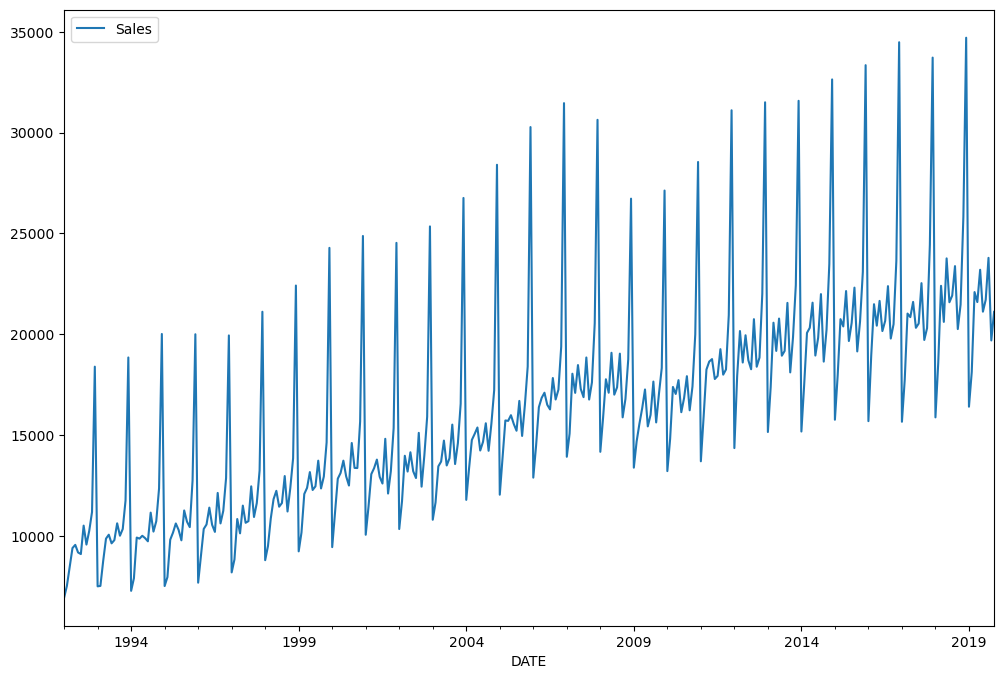

In [9]:
df.plot(figsize=(12,8))

In [10]:
len(df)

334

In [11]:
len(df) - 18

316

In [12]:
test_size = 18
test_ind = len(df) - test_size

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [15]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler()

In [19]:
scaler_train = scaler.transform(train)

In [20]:
scaler_test = scaler.transform(test)

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
len(test)

18

In [23]:
length = 12
generator = TimeseriesGenerator(scaler_train,scaler_train,
                               length=length,batch_size=1)

In [24]:
X,y = generator[0]

In [28]:
len(X[0])

12

In [26]:
y

array([[0.02047633]])

In [27]:
scaler_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [29]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense,LSTM

In [32]:
n_features = 1

In [33]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [37]:
validaton_generator = TimeseriesGenerator(scaler_test,scaler_test,
                                         length=length,batch_size=1)

In [38]:
model.fit(generator,epochs=20,validation_data=validaton_generator,
         callbacks=[early_stop])

Epoch 1/20
  1/304 ━━━━━━━━━━━━━━━━━━━━ 26:56 5s/step - loss: 0.0123

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0353 - val_loss: 0.0138
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0197 - val_loss: 0.0077
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0121 - val_loss: 0.0021
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0026 - val_loss: 6.2987e-04
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0018 - val_loss: 3.2411e-04
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0014 - val_loss: 6.5708e-04


In [39]:
loss = pd.DataFrame(model.history.history)

<Axes: >

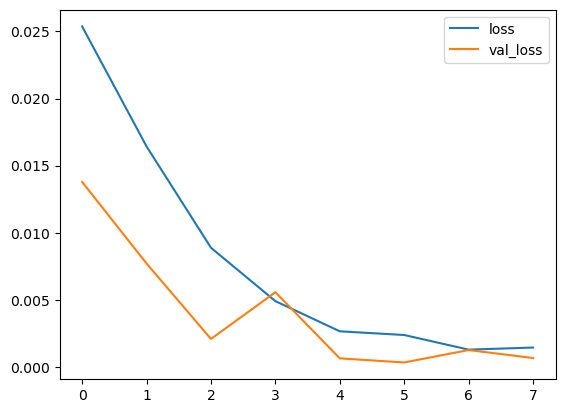

In [40]:
loss.plot()

In [43]:
test_predictions = []

first_eval_batch = scaler_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [44]:
true_predictions = scaler.inverse_transform(test_predictions)

In [45]:
test['Predictions'] = true_predictions

C:\Users\hp\AppData\Local\Temp\ipykernel_16056\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [47]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,20784.193981
2018-06-01,21589,19769.982189
2018-07-01,21919,19971.165559
2018-08-01,23381,21593.041686
2018-09-01,20260,19324.186229
2018-10-01,21473,19892.945185
2018-11-01,25831,23451.315907
2018-12-01,34706,33491.788136
2019-01-01,16410,15699.802368


<Axes: xlabel='DATE'>

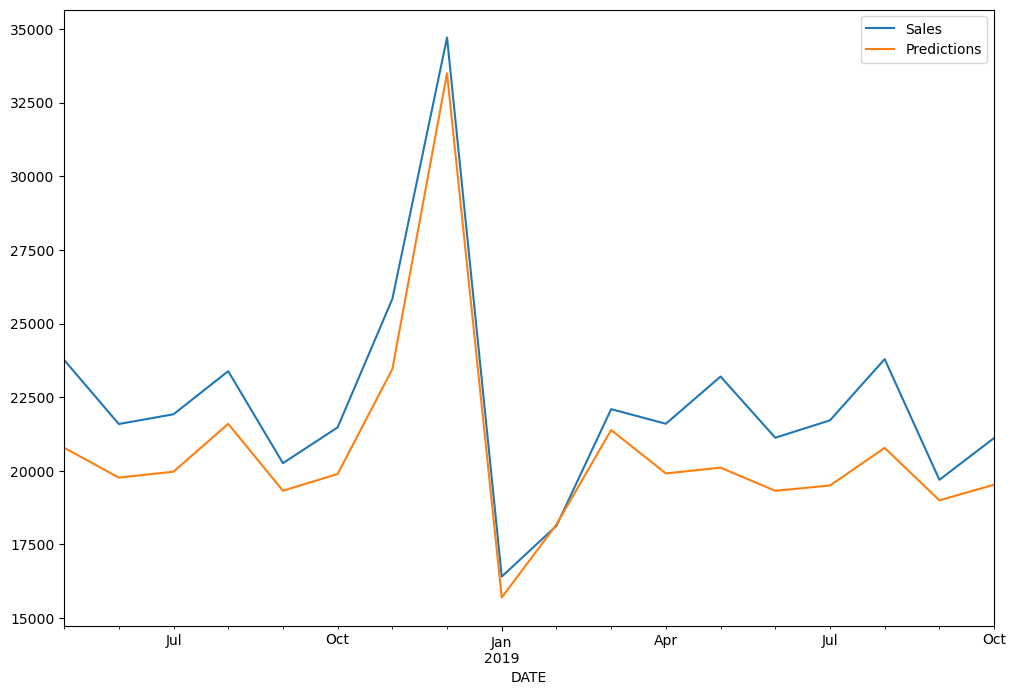

In [48]:
test.plot(figsize=(12,8))

In [49]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [50]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,
                               length=length,batch_size=1)

In [52]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit(generator,epochs=8)

Epoch 1/8


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 31/322 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0521

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0315
Epoch 2/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0209
Epoch 3/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0178
Epoch 4/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0065
Epoch 5/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0025
Epoch 6/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0030
Epoch 7/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0016
Epoch 8/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0029


In [53]:
forecast = []
periods=12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [54]:
forecast = full_scaler.inverse_transform(forecast)

In [55]:
forecast

array([[26512.25480223],
       [36363.27989006],
       [16848.95797825],
       [18789.59708524],
       [22453.18721056],
       [22099.38106918],
       [23595.21240139],
       [21696.52433157],
       [22305.54551172],
       [24253.62843895],
       [20564.05238819],
       [22034.55735302]])

In [56]:
forcast_index = pd.date_range(start='2019-11-01',periods=periods,
                             freq="MS")

In [58]:
forcast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [59]:
forcast_df = pd.DataFrame(data=forecast,index=forcast_index,
                         columns=['Forcast'])

In [60]:
forcast_df

,Forcast
2019-11-01,26512.254802
2019-12-01,36363.279890
2020-01-01,16848.957978
2020-02-01,18789.597085
2020-03-01,22453.187211
2020-04-01,22099.381069
2020-05-01,23595.212401
2020-06-01,21696.524332
2020-07-01,22305.545512
2020-08-01,24253.628439


<Axes: >

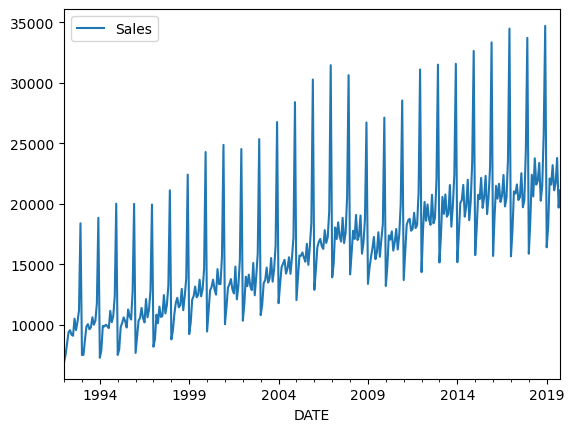

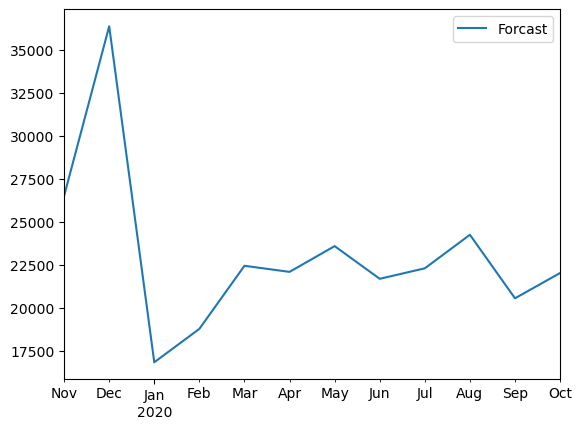

In [61]:
df.plot()
forcast_df.plot()

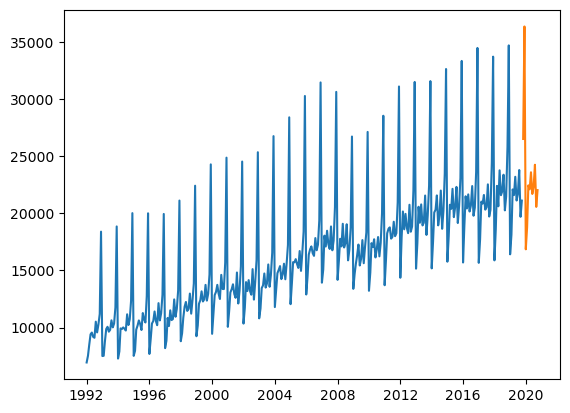

In [65]:
plt.plot(df.index,df['Sales'])
plt.plot(forcast_df.index,forcast_df['Forcast'])

(576.0, 609.0)

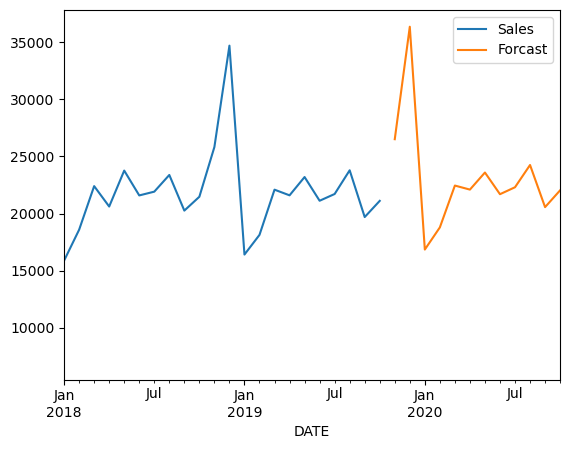

In [67]:
ax = df.plot()
forcast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-10-01')